In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [13]:
data=pd.read_excel("Data_Wordle_New.xlsx",sheet_name="Sheet1")
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),1N,2N,3N,4N,5N,6N,7N
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,9,1,-2.882184,-2.409384,-1.524777,-1.295440,-1.506294,-1.932263,-2.882184
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,14,2,-3.188637,-2.493988,-1.831230,-1.701596,-1.812747,-2.046830,-2.889762
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,22,4,-3.220398,-2.747598,-2.110776,-1.793355,-1.747598,-1.882296,-2.621575
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,17,2,-3.144873,-2.547134,-1.945074,-1.672073,-1.672073,-1.918745,-2.845998
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,5,1,-2.966440,-2.016519,-1.426693,-1.439282,-1.766641,-2.271791,-2.966440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3,-4.081320,-1.780290,-0.850871,-0.537252,-0.618922,-0.935192,-1.602753
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1,-3.878952,-1.401831,-0.556733,-0.276892,-0.481012,-0.924710,-1.874631
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2,-3.972216,-1.671186,-0.768096,-0.392432,-0.495095,-0.893035,-1.669020
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1,-3.938800,-1.336740,-0.616581,-0.359016,-0.523827,-0.984558,-1.934479


# 字母位次

In [14]:
data['Letters']=data['Word'].apply(lambda x:str(list(x))[1:-1].replace("'","").replace(" ",""))
data['w1'],data['w2'],data['w3'],data['w4'],data['w5']=data['Letters'].str.split(',',n=4).str
letter = [str(chr(i)) for i in range(ord('a'),ord('z')+1)]
letter_map = dict(zip(letter,range(1,27)))
data['w1'] = data['w1'].map(letter_map)
data['w2'] = data['w2'].map(letter_map)
data['w3'] = data['w3'].map(letter_map)
data['w4'] = data['w4'].map(letter_map)
data['w5'] = data['w5'].map(letter_map)
data

D:\TempS\ipykernel_28108\3066234943.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['w1'],data['w2'],data['w3'],data['w4'],data['w5']=data['Letters'].str.split(',',n=4).str


,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,4N,5N,6N,7N,Letters,w1,w2,w3,w4,w5
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,...,-1.295440,-1.506294,-1.932263,-2.882184,"s,l,u,m,p",19,12,21,13,16
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,-1.701596,-1.812747,-2.046830,-2.889762,"c,r,a,n,k",3,18,1,14,11
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,-1.793355,-1.747598,-1.882296,-2.621575,"g,o,r,g,e",7,15,18,7,5
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,-1.672073,-1.672073,-1.918745,-2.845998,"q,u,e,r,y",17,21,5,18,25
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,-1.439282,-1.766641,-2.271791,-2.966440,"d,r,i,n,k",4,18,9,14,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,...,-0.537252,-0.618922,-0.935192,-1.602753,"c,o,n,d,o",3,15,14,4,15
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,...,-0.276892,-0.481012,-0.924710,-1.874631,"i,m,p,e,l",9,13,16,5,12
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,...,-0.392432,-0.495095,-0.893035,-1.669020,"h,a,v,o,c",8,1,22,15,3
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,...,-0.359016,-0.523827,-0.984558,-1.934479,"m,o,l,a,r",13,15,12,1,18


# 元音、辅音

In [15]:
Vowel = ['a','e','i','o','u']
Consonant = list(set(letter).difference(set(Vowel)))


def count_vowel(s):
    c = 0
    for i in range(len(s)):
        if s[i] in Vowel:
            c+=1
    return c


def count_consonant(s):
    c = 0
    for i in range(len(s)):
        if s[i] in Consonant:
            c+=1
    return c


data['Vowel_fre'] = data['Word'].apply(lambda x:count_vowel(x))
data['Consonant_fre'] = data['Word'].apply(lambda x:count_consonant(x))
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,6N,7N,Letters,w1,w2,w3,w4,w5,Vowel_fre,Consonant_fre
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,...,-1.932263,-2.882184,"s,l,u,m,p",19,12,21,13,16,1,4
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,-2.046830,-2.889762,"c,r,a,n,k",3,18,1,14,11,1,4
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,-1.882296,-2.621575,"g,o,r,g,e",7,15,18,7,5,2,3
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,-1.918745,-2.845998,"q,u,e,r,y",17,21,5,18,25,2,3
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,-2.271791,-2.966440,"d,r,i,n,k",4,18,9,14,11,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,...,-0.935192,-1.602753,"c,o,n,d,o",3,15,14,4,15,2,3
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,...,-0.924710,-1.874631,"i,m,p,e,l",9,13,16,5,12,2,3
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,...,-0.893035,-1.669020,"h,a,v,o,c",8,1,22,15,3,2,3
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,...,-0.984558,-1.934479,"m,o,l,a,r",13,15,12,1,18,2,3


# 词性

In [19]:
word=list(data['Word'])
word

['slump',
 'crank',
 'gorge',
 'query',
 'drink',
 'favor',
 'abbey',
 'tangy',
 'panic',
 'solar',
 'shire',
 'proxy',
 'point',
 'robot',
 'prick',
 'wince',
 'crimp',
 'knoll',
 'sugar',
 'whack',
 'mount',
 'perky',
 'could',
 'wrung',
 'light',
 'those',
 'moist',
 'shard',
 'pleat',
 'aloft',
 'skill',
 'elder',
 'frame',
 'humor',
 'pause',
 'ulcer',
 'ultra',
 'robin',
 'cynic',
 'aroma',
 'caulk',
 'shake',
 'dodge',
 'swill',
 'tacit',
 'other',
 'thorn',
 'trove',
 'bloke',
 'vivid',
 'spill',
 'chant',
 'choke',
 'rupee',
 'nasty',
 'mourn',
 'ahead',
 'brine',
 'cloth',
 'hoard',
 'sweet',
 'month',
 'lapse',
 'watch',
 'today',
 'focus',
 'smelt',
 'tease',
 'cater',
 'movie',
 'saute',
 'allow',
 'renew',
 'their',
 'slosh',
 'purge',
 'chest',
 'depot',
 'epoxy',
 'nymph',
 'found',
 'shall',
 'stove',
 'lowly',
 'snout',
 'trope',
 'fewer',
 'shawl',
 'natal',
 'comma',
 'foray',
 'scare',
 'stair',
 'black',
 'squad',
 'royal',
 'chunk',
 'mince',
 'shame',
 'cheek',


In [25]:
# tokens = nltk.word_tokenize(word)

pos_tags = nltk.pos_tag(word)
# print(pos_tags)
pd.DataFrame(pos_tags).to_csv("test.csv")

In [23]:
pos_tags

[('slump', 'NN'),
 ('crank', 'NN'),
 ('gorge', 'NN'),
 ('query', 'NN'),
 ('drink', 'VB'),
 ('favor', 'NN'),
 ('abbey', 'NN'),
 ('tangy', 'NN'),
 ('panic', 'JJ'),
 ('solar', 'JJ'),
 ('shire', 'NN'),
 ('proxy', 'NN'),
 ('point', 'NN'),
 ('robot', 'NN'),
 ('prick', 'JJ'),
 ('wince', 'NN'),
 ('crimp', 'NN'),
 ('knoll', 'NN'),
 ('sugar', 'NN'),
 ('whack', 'NN'),
 ('mount', 'NN'),
 ('perky', 'NN'),
 ('could', 'MD'),
 ('wrung', 'VB'),
 ('light', 'JJ'),
 ('those', 'DT'),
 ('moist', 'JJ'),
 ('shard', 'JJ'),
 ('pleat', 'NN'),
 ('aloft', 'RB'),
 ('skill', 'JJ'),
 ('elder', 'NN'),
 ('frame', 'NN'),
 ('humor', 'NN'),
 ('pause', 'NN'),
 ('ulcer', 'JJ'),
 ('ultra', 'JJ'),
 ('robin', 'NN'),
 ('cynic', 'JJ'),
 ('aroma', 'NN'),
 ('caulk', 'NNS'),
 ('shake', 'VBP'),
 ('dodge', 'NN'),
 ('swill', 'NN'),
 ('tacit', 'VBZ'),
 ('other', 'JJ'),
 ('thorn', 'JJ'),
 ('trove', 'IN'),
 ('bloke', 'NN'),
 ('vivid', 'NN'),
 ('spill', 'NN'),
 ('chant', 'JJ'),
 ('choke', 'VBD'),
 ('rupee', 'JJ'),
 ('nasty', 'JJ'),
 ('mou

In [26]:
data['词性']=pd.DataFrame(pos_tags)[1]
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,7N,Letters,w1,w2,w3,w4,w5,Vowel_fre,Consonant_fre,词性
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,...,-2.882184,"s,l,u,m,p",19,12,21,13,16,1,4,NN
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,-2.889762,"c,r,a,n,k",3,18,1,14,11,1,4,NN
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,-2.621575,"g,o,r,g,e",7,15,18,7,5,2,3,NN
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,-2.845998,"q,u,e,r,y",17,21,5,18,25,2,3,NN
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,-2.966440,"d,r,i,n,k",4,18,9,14,11,1,4,VB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,...,-1.602753,"c,o,n,d,o",3,15,14,4,15,2,3,NN
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,...,-1.874631,"i,m,p,e,l",9,13,16,5,12,2,3,NN
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,...,-1.669020,"h,a,v,o,c",8,1,22,15,3,2,3,NN
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,...,-1.934479,"m,o,l,a,r",13,15,12,1,18,2,3,NN


In [ ]:
# 统计单词出现的相同字母的个数

In [35]:
def count_same_letter(s):
    d={}
    for char in set(s):
        d[char]=s.count(char)

    sum = 0
    for i in d:
        if d[i]>1:
            sum = sum + d[i]

    return sum

In [36]:
data['Same_letter_fre'] = data['Word'].apply(lambda x:count_same_letter(x))
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,Letters,w1,w2,w3,w4,w5,Vowel_fre,Consonant_fre,词性,Same_letter_fre
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,...,"s,l,u,m,p",19,12,21,13,16,1,4,NN,0
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,"c,r,a,n,k",3,18,1,14,11,1,4,NN,0
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,"g,o,r,g,e",7,15,18,7,5,2,3,NN,0
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,"q,u,e,r,y",17,21,5,18,25,2,3,NN,0
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,"d,r,i,n,k",4,18,9,14,11,1,4,VB,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,...,"c,o,n,d,o",3,15,14,4,15,2,3,NN,0
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,...,"i,m,p,e,l",9,13,16,5,12,2,3,NN,0
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,...,"h,a,v,o,c",8,1,22,15,3,2,3,NN,0
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,...,"m,o,l,a,r",13,15,12,1,18,2,3,NN,0


In [47]:
Frequency=pd.read_excel("字母频率.xlsx",sheet_name="Sheet1")
Frequency

,N,Letter,Frequency
0,1,a,0.0856
1,2,b,0.0212
2,3,c,0.0474
3,4,d,0.0313
4,5,e,0.1142
5,6,f,0.0147
6,7,g,0.0230
7,8,h,0.0276
8,9,i,0.0794
9,10,j,0.0015


In [48]:
# 转换为map
Frequency_map=dict(zip(Frequency['N'],Frequency['Frequency']))
Frequency_map

{1: 0.0856,
 2: 0.0212,
 3: 0.0474,
 4: 0.0313,
 5: 0.1142,
 6: 0.0147,
 7: 0.023,
 8: 0.0276,
 9: 0.0794,
 10: 0.0015,
 11: 0.0084,
 12: 0.0552,
 13: 0.0322,
 14: 0.0641,
 15: 0.0712,
 16: 0.0327,
 17: 0.0023,
 18: 0.0751,
 19: 0.0555,
 20: 0.0746,
 21: 0.0366,
 22: 0.0107,
 23: 0.0094,
 24: 0.0035,
 25: 0.02,
 26: 0.0024}

In [49]:
data['w1_fre']=data['w1']
data['w2_fre']=data['w2']
data['w3_fre']=data['w3']
data['w4_fre']=data['w4']
data['w5_fre']=data['w5']
data.replace({'w1_fre':Frequency_map,'w2_fre':Frequency_map,'w3_fre':Frequency_map,'w4_fre':Frequency_map,'w5_fre':Frequency_map},inplace=True)
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,w5,Vowel_fre,Consonant_fre,词性,Same_letter_fre,w1_fre,w2_fre,w3_fre,w4_fre,w5_fre
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,...,16,1,4,NN,0,0.0555,0.0552,0.0366,0.0322,0.0327
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,11,1,4,NN,0,0.0474,0.0751,0.0856,0.0641,0.0084
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,5,2,3,NN,0,0.0230,0.0712,0.0751,0.0230,0.1142
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,25,2,3,NN,0,0.0023,0.0366,0.1142,0.0751,0.0200
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,11,1,4,VB,0,0.0313,0.0751,0.0794,0.0641,0.0084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,...,15,2,3,NN,0,0.0474,0.0712,0.0641,0.0313,0.0712
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,...,12,2,3,NN,0,0.0794,0.0322,0.0327,0.1142,0.0552
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,...,3,2,3,NN,0,0.0276,0.0856,0.0107,0.0712,0.0474
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,...,18,2,3,NN,0,0.0322,0.0712,0.0552,0.0856,0.0751


In [51]:
data['Hard 1 try']=data['1 try']*(data['Number in hard mode']/data['Number of reported results'])
data['Hard 2 tries']=data['2 tries']*(data['Number in hard mode']/data['Number of reported results'])
data['Hard 3 tries']=data['3 tries']*(data['Number in hard mode']/data['Number of reported results'])
data['Hard 4 tries']=data['4 tries']*(data['Number in hard mode']/data['Number of reported results'])
data['Hard 5 tries']=data['5 tries']*(data['Number in hard mode']/data['Number of reported results'])
data['Hard 6 tries']=data['6 tries']*(data['Number in hard mode']/data['Number of reported results'])
data['Hard 7 or more tries (X)']=data['7 or more tries (X)']*(data['Number in hard mode']/data['Number of reported results'])
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,w3_fre,w4_fre,w5_fre,Hard 1 try,Hard 2 tries,Hard 3 tries,Hard 4 tries,Hard 5 tries,Hard 6 tries,Hard 7 or more tries (X)
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,...,0.0366,0.0322,0.0327,0.016892,0.050676,0.388515,0.658787,0.405407,0.152028,0.016892
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,0.0856,0.0641,0.0084,0.017369,0.086845,0.399486,0.538437,0.416855,0.243165,0.034738
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,0.0751,0.0230,0.1142,0.020912,0.062737,0.271861,0.564634,0.627371,0.460072,0.083649
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,0.1142,0.0751,0.0200,0.020927,0.083708,0.334833,0.627812,0.627812,0.355760,0.041854
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,0.0794,0.0641,0.0084,0.019606,0.176456,0.686217,0.666610,0.313699,0.098031,0.019606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,...,0.0641,0.0313,0.0712,0.000000,0.192730,1.638201,3.372767,2.794578,1.349107,0.289094
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,...,0.0327,0.1142,0.0552,0.000000,0.288244,2.017708,3.843254,2.402034,0.864732,0.096081
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,...,0.0107,0.0712,0.0474,0.000000,0.191890,1.535123,3.645918,2.878356,1.151342,0.191890
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,...,0.0552,0.0856,0.0751,0.000000,0.372194,1.954018,3.535842,2.419261,0.837436,0.093048


In [55]:
import sklearn.preprocessing as sp
le=sp.LabelEncoder()
data['词性']=le.fit_transform(data['词性'])
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,w3_fre,w4_fre,w5_fre,Hard 1 try,Hard 2 tries,Hard 3 tries,Hard 4 tries,Hard 5 tries,Hard 6 tries,Hard 7 or more tries (X)
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,...,0.0366,0.0322,0.0327,0.016892,0.050676,0.388515,0.658787,0.405407,0.152028,0.016892
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,0.0856,0.0641,0.0084,0.017369,0.086845,0.399486,0.538437,0.416855,0.243165,0.034738
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,0.0751,0.0230,0.1142,0.020912,0.062737,0.271861,0.564634,0.627371,0.460072,0.083649
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,0.1142,0.0751,0.0200,0.020927,0.083708,0.334833,0.627812,0.627812,0.355760,0.041854
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,0.0794,0.0641,0.0084,0.019606,0.176456,0.686217,0.666610,0.313699,0.098031,0.019606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,...,0.0641,0.0313,0.0712,0.000000,0.192730,1.638201,3.372767,2.794578,1.349107,0.289094
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,...,0.0327,0.1142,0.0552,0.000000,0.288244,2.017708,3.843254,2.402034,0.864732,0.096081
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,...,0.0107,0.0712,0.0474,0.000000,0.191890,1.535123,3.645918,2.878356,1.151342,0.191890
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,...,0.0552,0.0856,0.0751,0.000000,0.372194,1.954018,3.535842,2.419261,0.837436,0.093048


In [58]:
X=data[['1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)','w1','w2','w3','w4','w5','Vowel_fre','Consonant_fre','Same_letter_fre','词性','w1_fre','w2_fre','w3_fre','w4_fre','w5_fre']]
X

,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),w1,w2,w3,...,w5,Vowel_fre,Consonant_fre,Same_letter_fre,词性,w1_fre,w2_fre,w3_fre,w4_fre,w5_fre
0,1,3,23,39,24,9,1,19,12,21,...,16,1,4,0,7,0.0555,0.0552,0.0366,0.0322,0.0327
1,1,5,23,31,24,14,2,3,18,1,...,11,1,4,0,7,0.0474,0.0751,0.0856,0.0641,0.0084
2,1,3,13,27,30,22,4,7,15,18,...,5,2,3,0,7,0.0230,0.0712,0.0751,0.0230,0.1142
3,1,4,16,30,30,17,2,17,21,5,...,25,2,3,0,7,0.0023,0.0366,0.1142,0.0751,0.0200
4,1,9,35,34,16,5,1,4,18,9,...,11,1,4,0,12,0.0313,0.0751,0.0794,0.0641,0.0084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0,2,17,35,29,14,3,3,15,14,...,15,2,3,0,7,0.0474,0.0712,0.0641,0.0313,0.0712
355,0,3,21,40,25,9,1,9,13,16,...,12,2,3,0,7,0.0794,0.0322,0.0327,0.1142,0.0552
356,0,2,16,38,30,12,2,8,1,22,...,3,2,3,0,7,0.0276,0.0856,0.0107,0.0712,0.0474
357,0,4,21,38,26,9,1,13,15,12,...,18,2,3,0,7,0.0322,0.0712,0.0552,0.0856,0.0751


In [ ]:
# ,'Hard 1 try','Hard 2 tries','Hard 3 tries','Hard 4 tries','Hard 5 tries','Hard 6 tries','Hard 7 or more tries (X)'

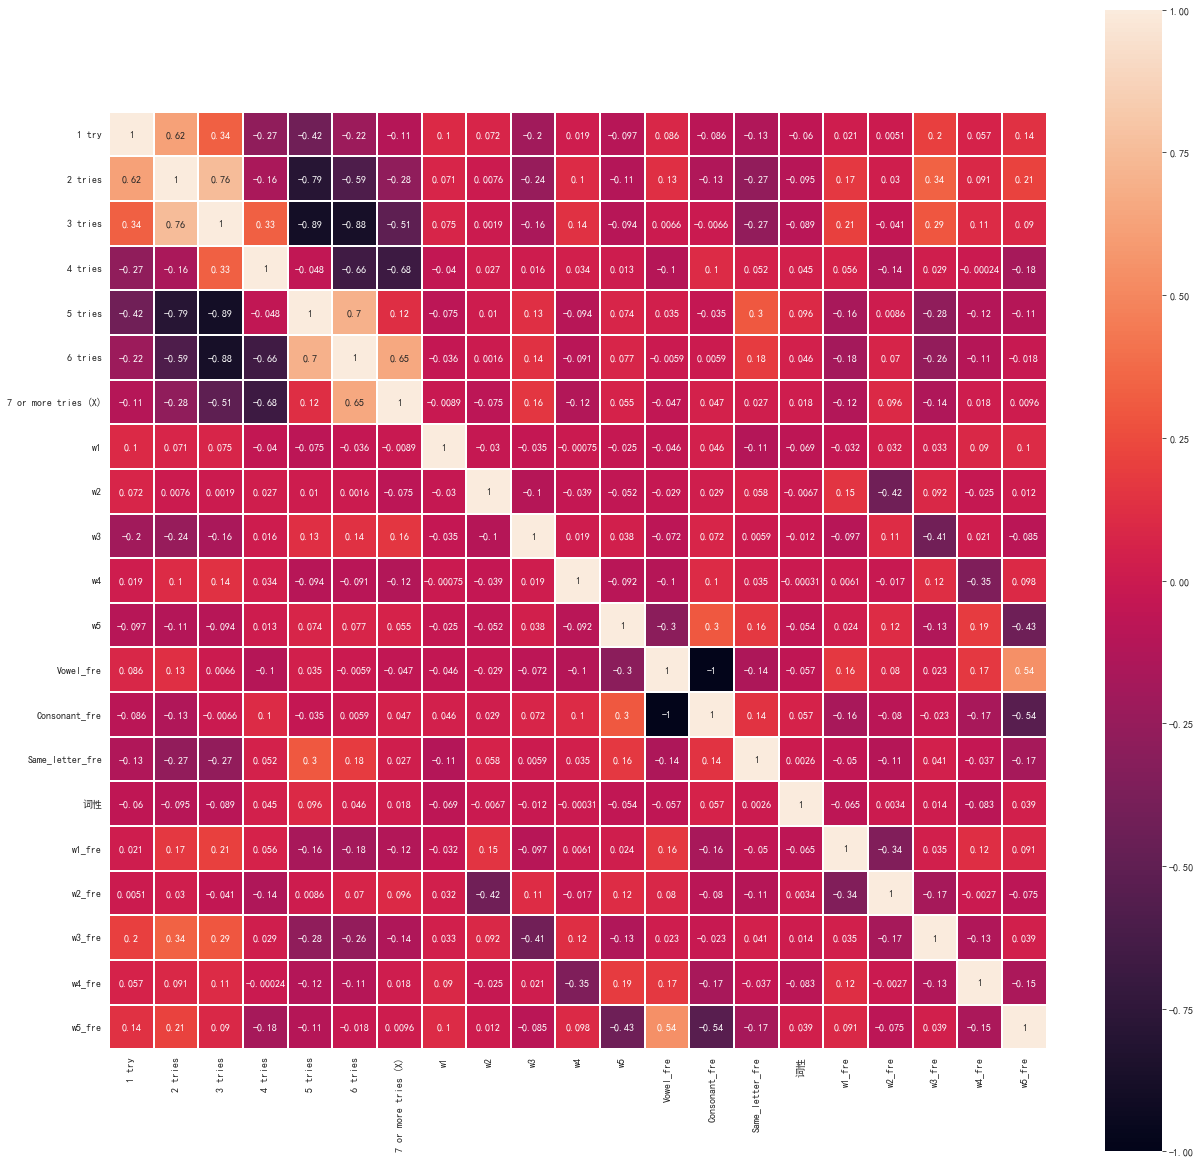

In [63]:
plt.subplots(figsize = (21, 21))
sns.heatmap(X.corr(method='pearson'),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# plt.title('语音业务评分皮尔逊相关系数热力图')
plt.savefig('x.pdf',bbox_inches='tight')